# Pretrage grafova

In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

In [2]:
def napravi_putanju(rezultat):
    putanja = []
    roditelj = rezultat
    while roditelj[1] is not None:
        putanja.insert(0, (roditelj[1][0], roditelj[0]))
        roditelj = roditelj[1]
    return putanja

## Zadatak 1

Proširiti graf sa prethodnih vežbi tako da za grane uvede dodati atribut koji predstavlja udaljenost između povezanih gradova.

{('Beograd', 'Novi Sad'): Text(0.4750710978488624, 0.29099459822296747, '93'),
 ('Beograd', 'Nis'): Text(0.20999671509539214, 0.11346116709778586, '237'),
 ('Beograd', 'Subotica'): Text(0.52351499655453, 0.544933148372676, '190'),
 ('Beograd', 'Valjevo'): Text(-0.07691385333693593, 0.2930845867078218, '102'),
 ('Novi Sad', 'Beograd'): Text(0.4750710978488624, 0.29099459822296747, '93'),
 ('Novi Sad',
  'Subotica'): Text(0.7469844479290576, 0.44544636173436686, '105'),
 ('Novi Sad', 'Nis'): Text(0.43346616646991964, 0.013974380459476618, '326'),
 ('Subotica', 'Beograd'): Text(0.52351499655453, 0.544933148372676, '190'),
 ('Subotica',
  'Novi Sad'): Text(0.7469844479290576, 0.44544636173436686, '105'),
 ('Nis', 'Beograd'): Text(0.20999671509539214, 0.11346116709778586, '237'),
 ('Nis', 'Novi Sad'): Text(0.43346616646991964, 0.013974380459476618, '326'),
 ('Nis', 'Leskovac'): Text(-0.17007059459212198, -0.29113311804581365, '44'),
 ('Valjevo', 'Beograd'): Text(-0.07691385333693593, 0.2930

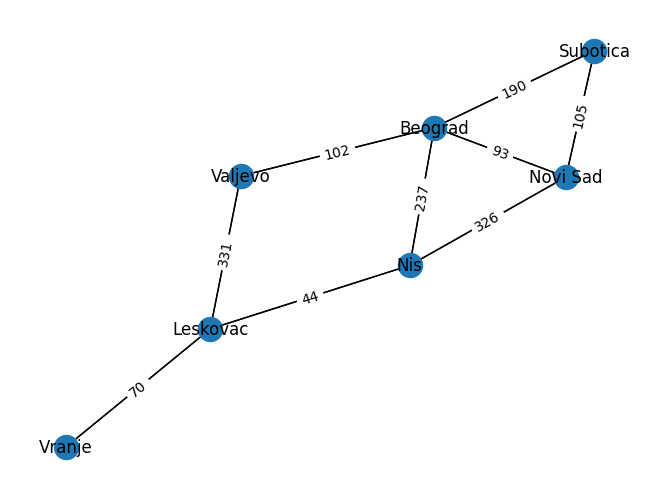

In [3]:
graf = {
    "Beograd": {"Novi Sad": {"udaljenost": 93}, "Nis": {"udaljenost": 237}, "Subotica": {"udaljenost": 190}, "Valjevo": {"udaljenost": 102}},
    "Novi Sad": {"Beograd": {"udaljenost": 93}, "Subotica": {"udaljenost": 105}, "Nis": {"udaljenost": 326}},
    "Subotica": {"Beograd": {"udaljenost": 190}, "Novi Sad": {"udaljenost": 105}},
    "Nis": {"Beograd": {"udaljenost": 237}, "Novi Sad": {"udaljenost": 326}, "Leskovac": {"udaljenost": 44}},
    "Valjevo": {"Beograd": {"udaljenost": 102}, "Leskovac": {"udaljenost": 331}},
    "Leskovac": {"Valjevo": {"udaljenost": 331}, "Nis": {"udaljenost": 44}, "Vranje": {"udaljenost": 70}},
    "Vranje": {"Leskovac": {"udaljenost": 70}}
}

nx_graf = nx.from_dict_of_dicts(graf, create_using=nx.DiGraph)
layout = nx.spring_layout(nx_graf)
labele_udaljenost = nx.get_edge_attributes(nx_graf, "udaljenost")
nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edge_labels(nx_graf, layout, labele_udaljenost)

## Zadatak 2

Implementirati uniform cost pretragu.

In [4]:
def ucs(graf, pocetni_cvor, ciljni_cvor):
    za_obradu = [(pocetni_cvor, None, 0)]
    obradjeni = set([(pocetni_cvor, 0)])
    
    while len(za_obradu) > 0:
        za_obradu = sorted(za_obradu, key=lambda x: x[2])
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor[0] == ciljni_cvor:
            return trenutni_cvor

        for sused in graf[trenutni_cvor[0]]:
            if (sused, trenutni_cvor[2] + graf[trenutni_cvor[0]][sused]["udaljenost"]) not in obradjeni:
                za_obradu.append((sused, trenutni_cvor, trenutni_cvor[2] + graf[trenutni_cvor[0]][sused]["udaljenost"]))
                obradjeni.add((sused, trenutni_cvor[2] + graf[trenutni_cvor[0]][sused]["udaljenost"]))

    return None

In [5]:
rezultat = ucs(graf, "Beograd", "Vranje")
print(rezultat)

putanja = napravi_putanju(rezultat)
print(putanja)

nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edges(nx_graf, edgelist=putanja, pos=layout, edge_color="r", arrows=True, width=2, arrowsize=25, arrowstyle="-|>")
nx.draw_networkx_edge_labels(nx_graf, layout, labele_udaljenost)

('Vranje', ('Leskovac', ('Nis', ('Beograd', None, 0), 237), 281), 351)
[('Beograd', 'Nis'), ('Nis', 'Leskovac'), ('Leskovac', 'Vranje')]


{('Beograd', 'Novi Sad'): Text(0.4750710978488624, 0.29099459822296747, '93'),
 ('Beograd', 'Nis'): Text(0.20999671509539214, 0.11346116709778586, '237'),
 ('Beograd', 'Subotica'): Text(0.52351499655453, 0.544933148372676, '190'),
 ('Beograd', 'Valjevo'): Text(-0.07691385333693593, 0.2930845867078218, '102'),
 ('Novi Sad', 'Beograd'): Text(0.4750710978488624, 0.29099459822296747, '93'),
 ('Novi Sad',
  'Subotica'): Text(0.7469844479290576, 0.44544636173436686, '105'),
 ('Novi Sad', 'Nis'): Text(0.43346616646991964, 0.013974380459476618, '326'),
 ('Subotica', 'Beograd'): Text(0.52351499655453, 0.544933148372676, '190'),
 ('Subotica',
  'Novi Sad'): Text(0.7469844479290576, 0.44544636173436686, '105'),
 ('Nis', 'Beograd'): Text(0.20999671509539214, 0.11346116709778586, '237'),
 ('Nis', 'Novi Sad'): Text(0.43346616646991964, 0.013974380459476618, '326'),
 ('Nis', 'Leskovac'): Text(-0.17007059459212198, -0.29113311804581365, '44'),
 ('Valjevo', 'Beograd'): Text(-0.07691385333693593, 0.2930

## Zadatak 3

Napisati pohlepnu pretragu koja u obzir uzima samo udaljenost gradova.

In [6]:
def h(layout, pocetna_pozicija, krajnja_pozicija):
    p1 = layout[pocetna_pozicija]
    p2 = layout[krajnja_pozicija]
    return np.sum((p1-p2)**2)

In [7]:
def pohlepna_pretraga(graf, pocetni_cvor, ciljni_cvor, h, layout):
    za_obradu = [(pocetni_cvor, None, 0)]
    obradjeni = set([(pocetni_cvor, 0)])
    
    while len(za_obradu) > 0:
        za_obradu = sorted(za_obradu, key=lambda x: h(layout, x[0], ciljni_cvor))
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor[0] == ciljni_cvor:
            print(obradjeni)
            return trenutni_cvor

        for sused in graf[trenutni_cvor[0]]:
            cena = h(layout, sused, ciljni_cvor)
            if (sused, cena) not in obradjeni:
                za_obradu.append((sused, trenutni_cvor, cena))
                obradjeni.add((sused, cena))
    return None

{('Beograd', 0.3911688688144641), ('Valjevo', 1.6957700071785784), ('Nis', 1.1378471337374818), ('Vranje', 0), ('Vranje', 5.764974646199717), ('Subotica', 0.0), ('Novi Sad', 0.26732639429576427), ('Leskovac', 2.95044506091162)}
('Subotica', ('Novi Sad', ('Nis', ('Leskovac', ('Vranje', None, 0), 2.95044506091162), 1.1378471337374818), 0.26732639429576427), 0.0)
[('Vranje', 'Leskovac'), ('Leskovac', 'Nis'), ('Nis', 'Novi Sad'), ('Novi Sad', 'Subotica')]
Beograd: 0.3911688688144641
Novi Sad: 0.26732639429576427
Subotica: 0.0
Nis: 1.1378471337374818
Valjevo: 1.6957700071785784
Leskovac: 2.95044506091162
Vranje: 5.764974646199717


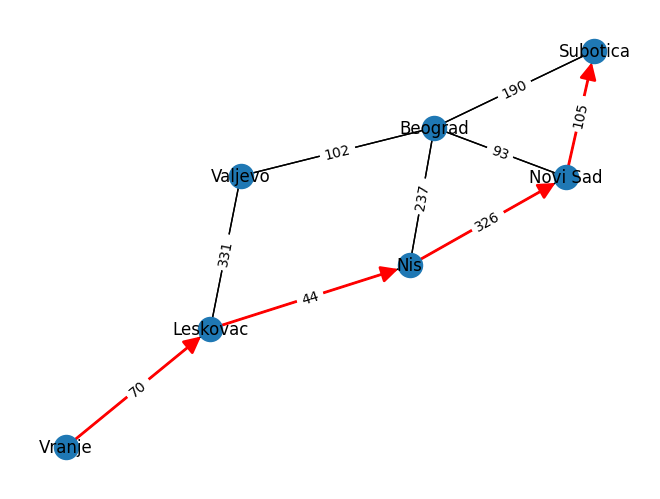

In [8]:
rezultat = pohlepna_pretraga(graf, "Vranje", "Subotica", h, layout)
print(rezultat)

putanja = napravi_putanju(rezultat)
print(putanja)

nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edges(nx_graf, edgelist=putanja, pos=layout, edge_color="r", arrows=True, width=2, arrowsize=25, arrowstyle="-|>")
nx.draw_networkx_edge_labels(nx_graf, layout, labele_udaljenost)

for cvor in graf:
    print(f"{cvor}: {h(layout, cvor, 'Subotica')}")

## Zadatak 4

Implementirati A* pretragu.

In [9]:
def a_zvezda(graf, pocetni_cvor, ciljni_cvor, h, layout):
    za_obradu = [(pocetni_cvor, None, 0)]
    obradjeni = set([(pocetni_cvor, 0)])
    
    while len(za_obradu) > 0:
        za_obradu = sorted(za_obradu, key=lambda x: x[2] + h(layout, x[0], ciljni_cvor))
        trenutni_cvor = za_obradu.pop(0)
        if trenutni_cvor[0] == ciljni_cvor:
            return trenutni_cvor

        for sused in graf[trenutni_cvor[0]]:
            cena = trenutni_cvor[2] + graf[trenutni_cvor[0]][sused]["udaljenost"]
            if (sused, cena) not in obradjeni:
                za_obradu.append((sused, trenutni_cvor, cena))
                obradjeni.add((sused, cena))
    return None

('Subotica', ('Beograd', ('Nis', ('Leskovac', ('Vranje', None, 0), 70), 114), 351), 541)
[('Vranje', 'Leskovac'), ('Leskovac', 'Nis'), ('Nis', 'Beograd'), ('Beograd', 'Subotica')]
Beograd: 0.3911688688144641
Novi Sad: 0.26732639429576427
Subotica: 0.0
Nis: 1.1378471337374818
Valjevo: 1.6957700071785784
Leskovac: 2.95044506091162
Vranje: 5.764974646199717


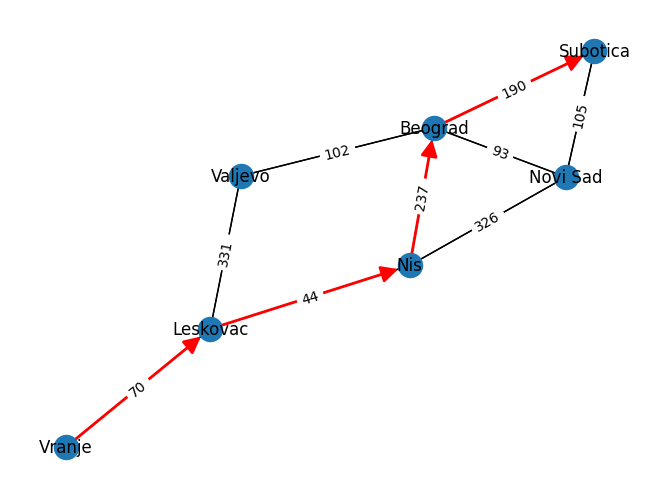

In [10]:
rezultat = a_zvezda(graf, "Vranje", "Subotica", h, layout)
print(rezultat)

putanja = napravi_putanju(rezultat)
print(putanja)

nx.draw(nx_graf, pos = layout, with_labels = True, arrows = False)
nx.draw_networkx_edges(nx_graf, edgelist=putanja, pos=layout, edge_color="r", arrows=True, width=2, arrowsize=25, arrowstyle="-|>")
nx.draw_networkx_edge_labels(nx_graf, layout, labele_udaljenost)

for cvor in graf:
    print(f"{cvor}: {h(layout, cvor, 'Subotica')}")